# Modeling

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pydataset import data

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import wrangle_mall as w




## Clustering with the Iris Dataset

In [2]:
iris = data('iris')

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Choose features other than the ones used in the lesson.

- Sepal Width

- Petal Width

## Visualize the results of your clustering.

In [4]:
X = iris[['Petal.Width', 'Sepal.Width']]


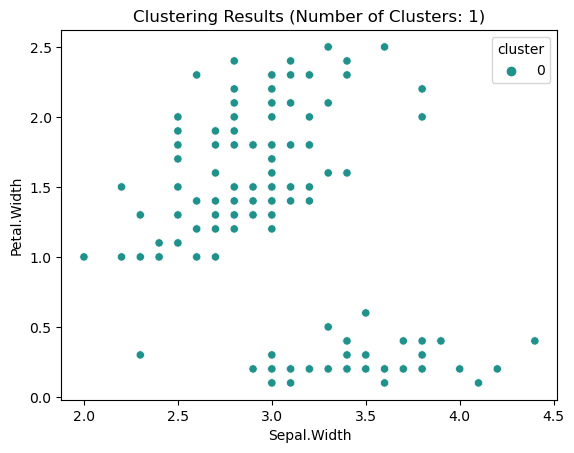

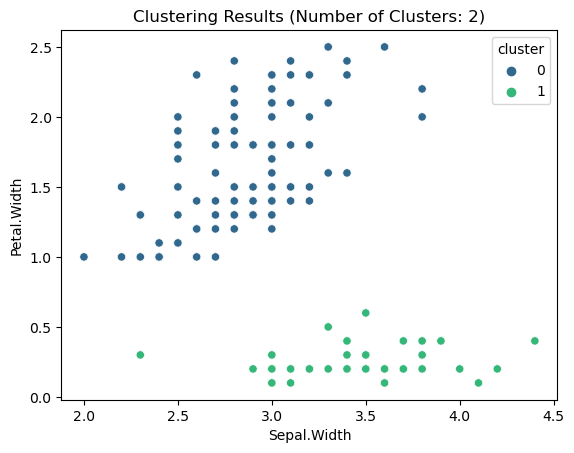

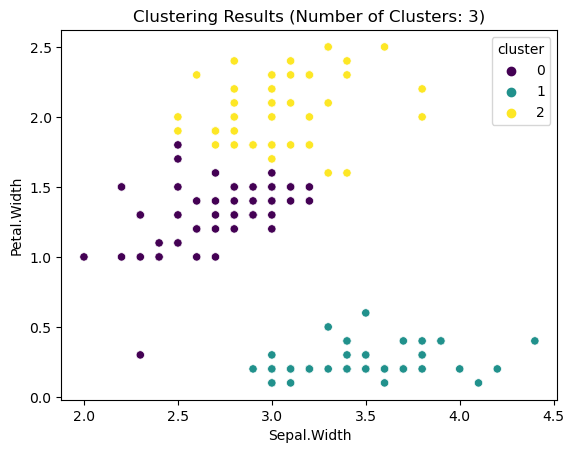

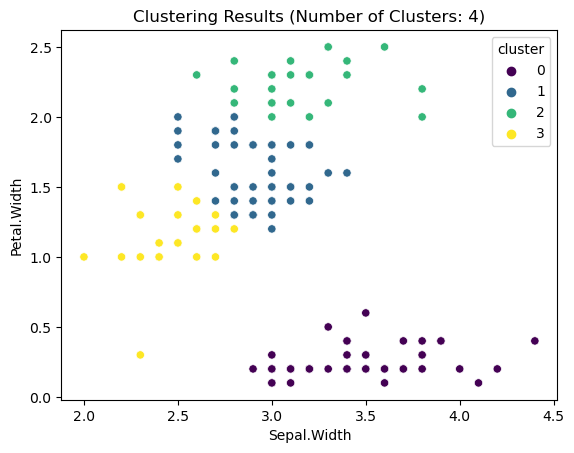

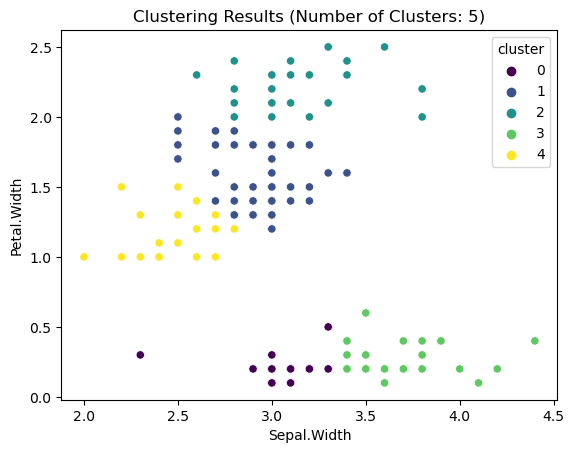

In [5]:
for num_clusters in range(1, 6):
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)

    cluster_labels = kmeans.predict(X)

    iris['cluster'] = cluster_labels

    sns.scatterplot(data=iris, x='Sepal.Width', y='Petal.Width', hue='cluster', palette='viridis')
    plt.xlabel('Sepal.Width')
    plt.ylabel('Petal.Width')
    plt.title(f'Clustering Results (Number of Clusters: {num_clusters})')
    plt.show()

## Use the elbow method to visually select a good value for k.

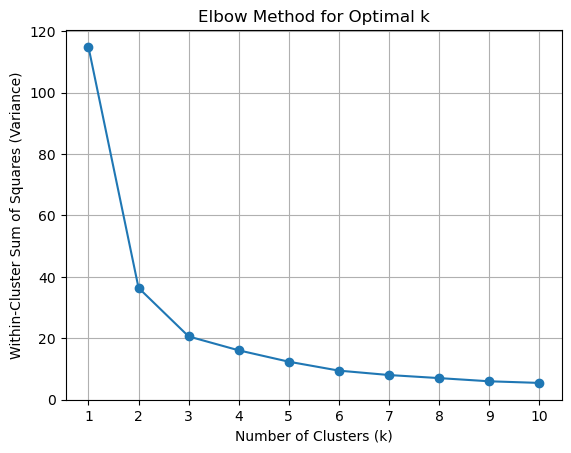

In [6]:
 within_cluster_variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    

    within_cluster_variances.append(kmeans.inertia_)


plt.plot(range(1, 11), within_cluster_variances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Variance)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

## Repeat the clustering, this time with 3 different features.

- Sepal.Length
- Sepal.Width
- Petal.Length

## Visualize

In [7]:
X = iris[['Petal.Length','Sepal.Length','Sepal.Width']]


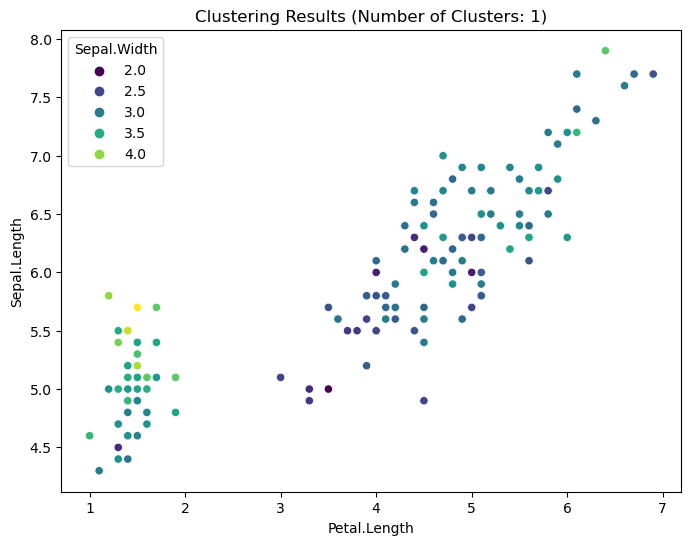

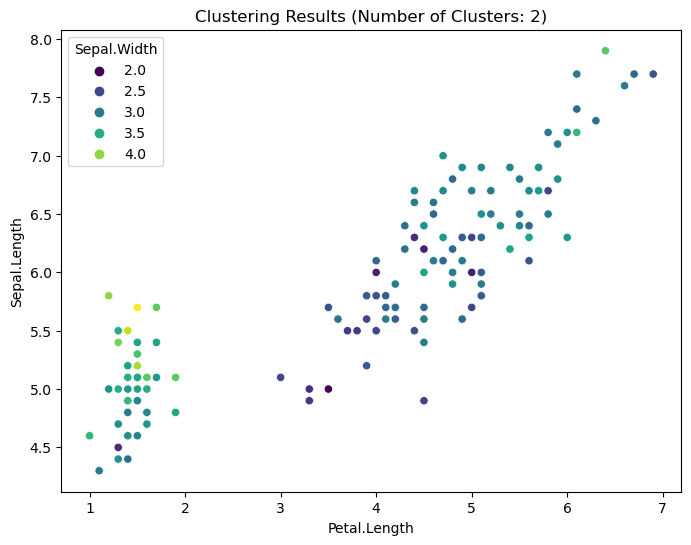

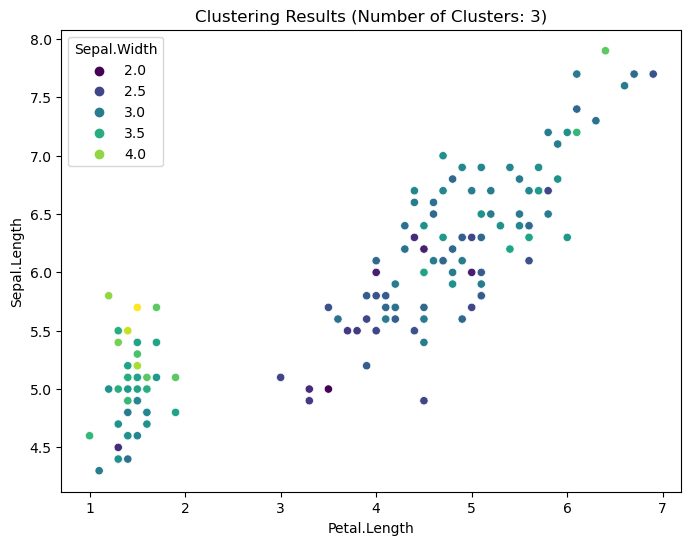

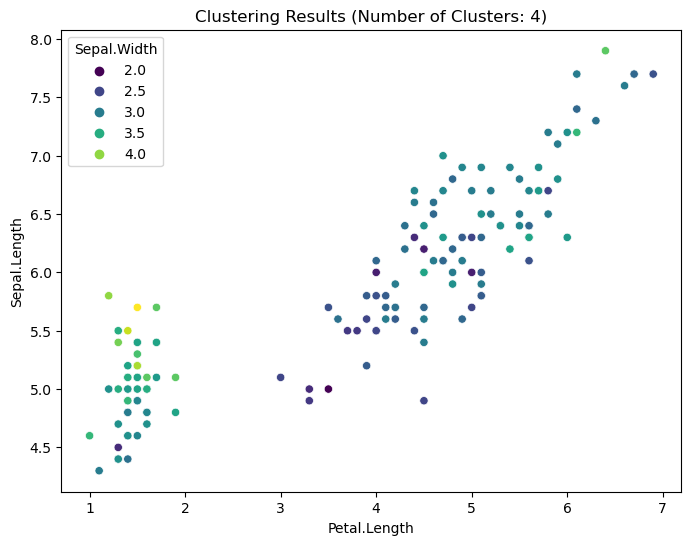

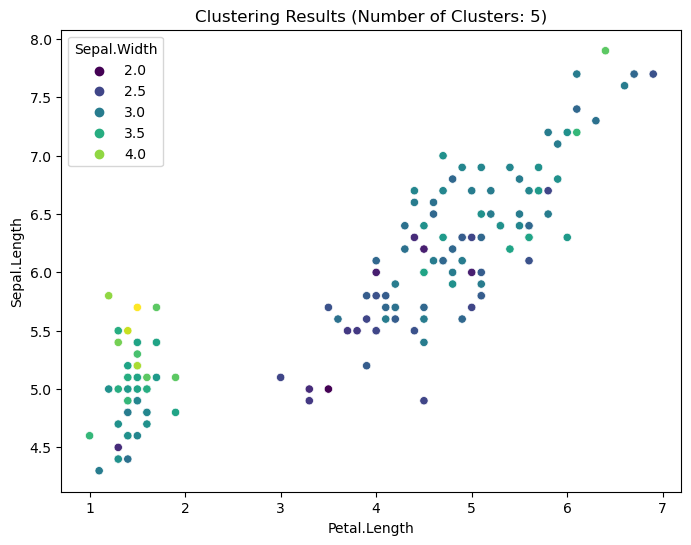

In [8]:
for k in range(1, 6):

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    

    cluster_labels = kmeans.predict(X)
    
    iris_clustered = iris.copy()
    iris_clustered['cluster'] = cluster_labels
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=iris_clustered, x='Petal.Length', y='Sepal.Length', hue='Sepal.Width', palette='viridis')
    plt.xlabel('Petal.Length')
    plt.ylabel('Sepal.Length')
    plt.title(f'Clustering Results (Number of Clusters: {k})')
    plt.show()

## Elbow Method

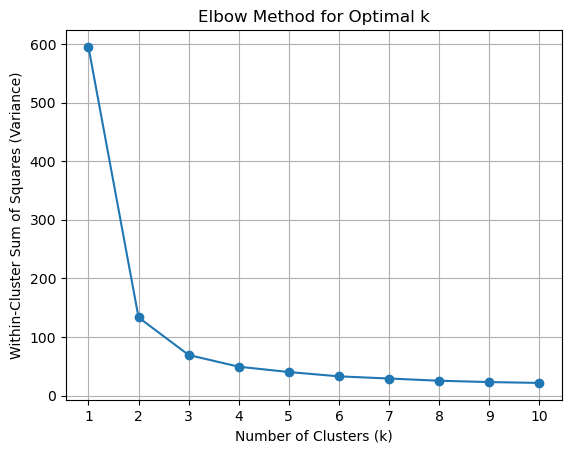

In [9]:
 within_cluster_variances = []


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    within_cluster_variances.append(kmeans.inertia_)


plt.plot(range(1, 11), within_cluster_variances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Variance)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

## Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [10]:
train, validate, test = w.wrangle_mall()

In [11]:
train.head()

,customer_id,gender,age,annual_income,spending_score,gender_Female,gender_Male
123,124,Male,39,69,91,0,1
76,77,Female,45,54,53,1,0
171,172,Male,28,87,75,0,1
10,11,Male,67,19,14,0,1
35,36,Female,21,33,81,1,0


## Visualization

In [12]:
X = train[['age', 'annual_income']]

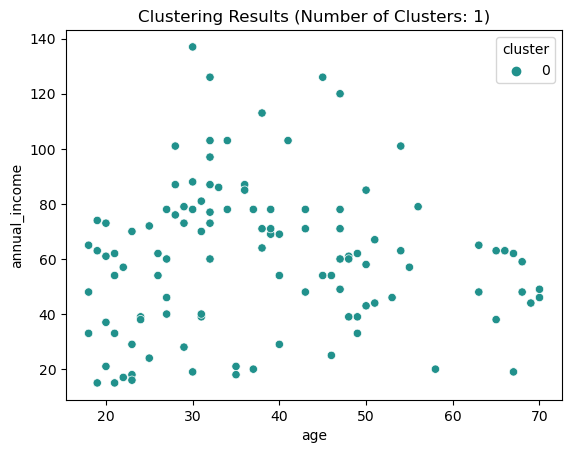

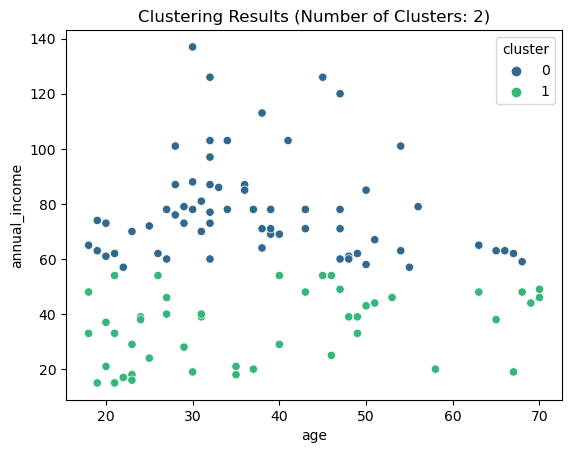

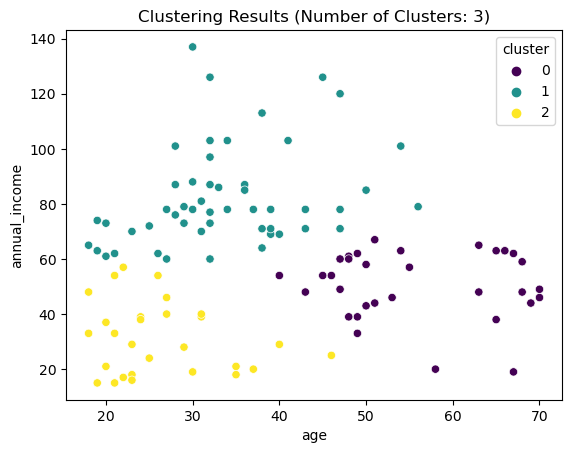

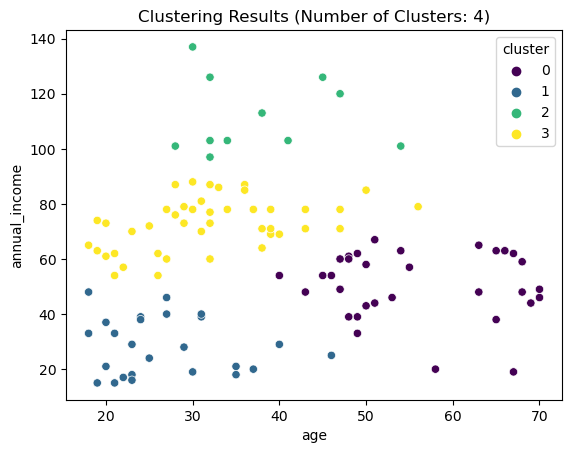

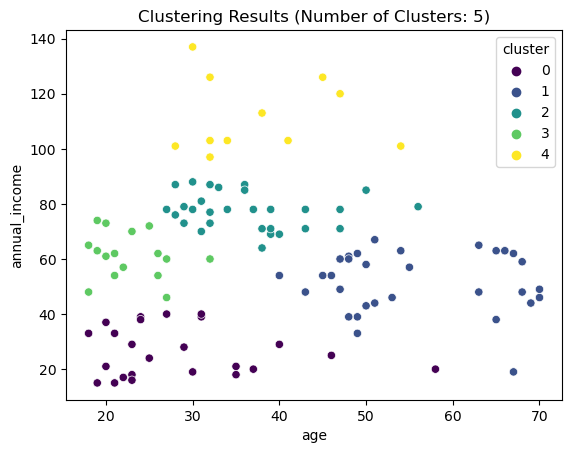

In [13]:
for num_clusters in range(1, 6):
  
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    
    cluster_labels = kmeans.predict(X)
    
    train['cluster'] = cluster_labels
    
    sns.scatterplot(data=train, x='age', y='annual_income', hue='cluster', palette='viridis')
    plt.xlabel('age')
    plt.ylabel('annual_income')
    plt.title(f'Clustering Results (Number of Clusters: {num_clusters})')
    plt.show()

## Elbow Method

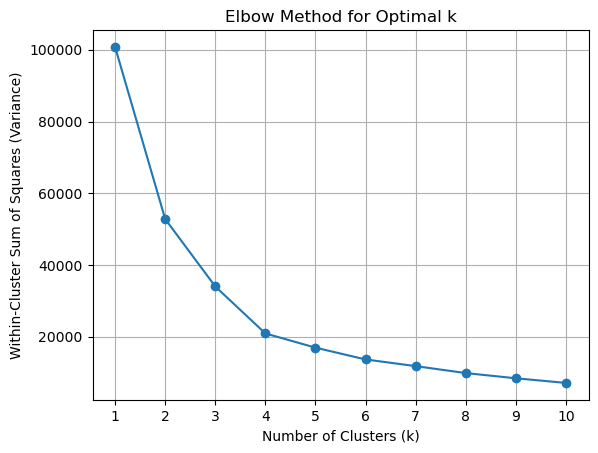

In [14]:
 unscaled_cluster_variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    unscaled_cluster_variances.append(kmeans.inertia_)

plt.plot(range(1, 11), unscaled_cluster_variances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Variance)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

## How does scaling impact the results of clustering?

In [15]:
train_scaled, validate_scaled, test_scaled = w.scale_data(train, validate, test)

In [16]:
train_scaled.head()

,customer_id,gender,age,annual_income,spending_score,gender_Female,gender_Male,cluster
123,124,Male,0.403846,0.442623,0.957447,0,1,2
76,77,Female,0.519231,0.319672,0.553191,1,0,1
171,172,Male,0.192308,0.590164,0.787234,0,1,2
10,11,Male,0.942308,0.032787,0.138298,0,1,1
35,36,Female,0.057692,0.147541,0.851064,1,0,0


In [17]:
X = train_scaled[['age', 'annual_income']]

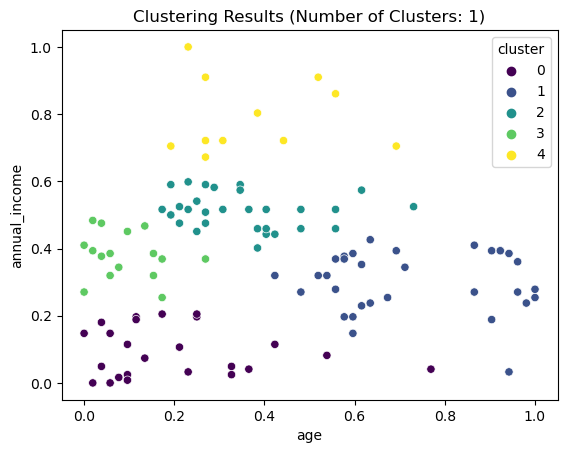

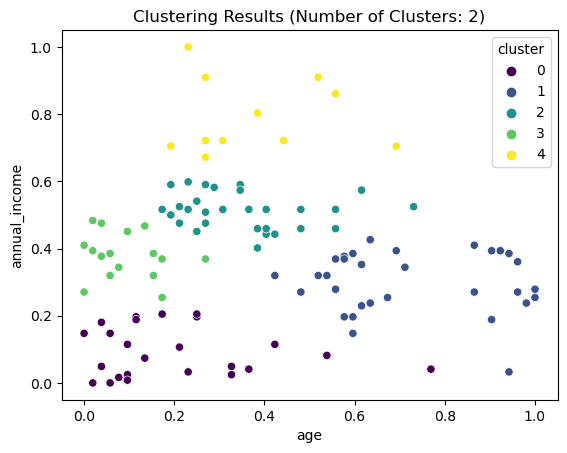

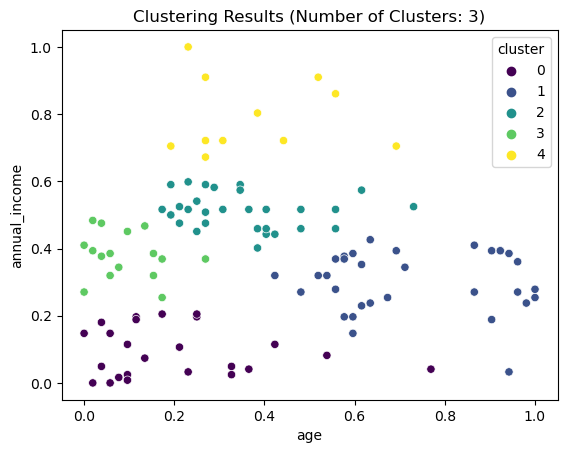

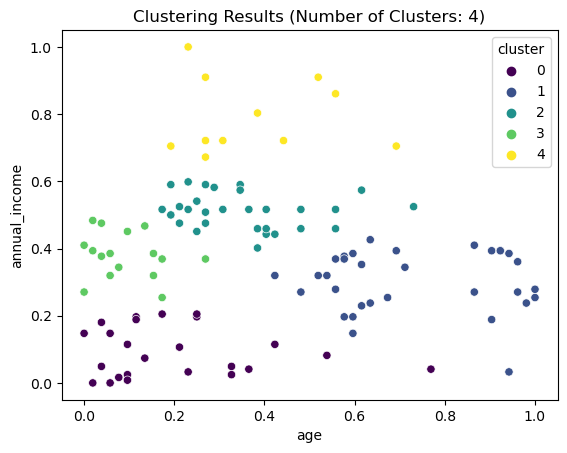

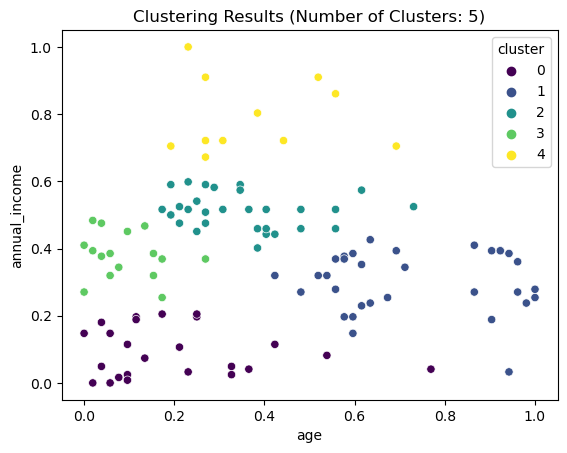

In [18]:
for num_clusters in range(1, 6):
  
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    
    cluster_labels = kmeans.predict(X)
    
    train['cluster'] = cluster_labels
    
    sns.scatterplot(data=train_scaled, x='age', y='annual_income', hue='cluster', palette='viridis')
    plt.xlabel('age')
    plt.ylabel('annual_income')
    plt.title(f'Clustering Results (Number of Clusters: {num_clusters})')
    plt.show()

## Elbow Method

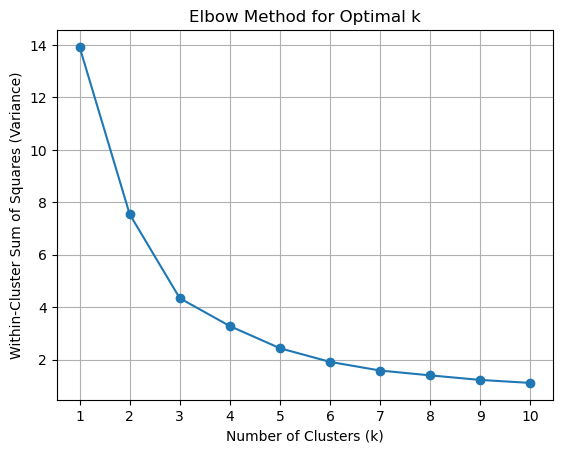

In [19]:
scaled_cluster_variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    scaled_cluster_variances.append(kmeans.inertia_)

plt.plot(range(1, 11), scaled_cluster_variances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Variance)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

## Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

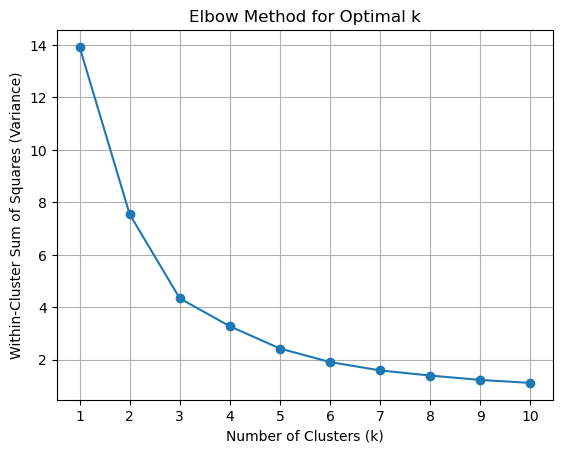

In [20]:
 unscaled_cluster_variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
   
    unscaled_cluster_variances.append(kmeans.inertia_)


plt.plot(range(1, 11), unscaled_cluster_variances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Variance)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

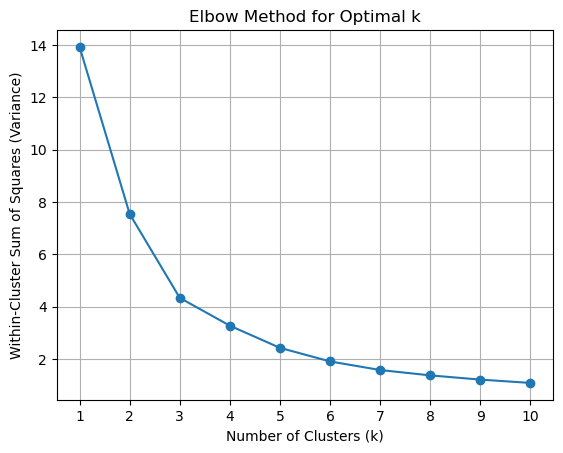

In [21]:
 scaled_cluster_variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    scaled_cluster_variances.append(kmeans.inertia_)


plt.plot(range(1, 11), scaled_cluster_variances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Variance)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

### Scaled and Unscaled data did not make a difference for features age and annual income.